In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import chi2_contingency
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
df=pd.read_csv("fileSSSS.csv")

In [18]:
def cleanString(string):
    if(string=="מרצדס בנץ" or string=="מרצדס-בנץ" or string=="דימלר בנץ"):
        string="מרצדס"
    elif(string=="הונדה-יפן" or string=='הונדה-ארהב"' or string=="הונדה-קנדה"):
        string="הונדה"
    elif(string=="אופל-גרמניה" or string=="אופל-ספרד"):
        string="אופל"
    elif(string=="דימלרקריזלר-אר" or string=="דימלרקריזלר-גר" or string=="דימלרקריזלר-מק" or string=="דימלרקריזלר-קנ" or string=="דימלרקריזלר-אס"):
        string="מרדצס"
    elif(string=='האמר-ארהב"'):
        string="האמר"
    elif(string=="סוזוקי-יפן"):
        string="סוזוקי"
    elif(string=="טויוטה ב מ"):
        string="טויוטה"
    elif(string=="טריאומף" or string=="טריומף"):
        string="טריומף"
    elif(string=="משיננבאו_גרמני"):
        string="משיננבאו"
    elif(string=="פולאריס" or string=="פולריס"):
        string="פולריס"
    elif(string=="קרייזלר-צרפת" or string=="קרייזלר-אוסטרי"):
        string="קרייזלר"
    elif(string=="בומברדיה_קנדה"):
        string="בומברדיה"
    elif(string=="וולבו-ג.מ"):
        string="וולבו"
    elif(string=="פולקסווגן-ספרד" or string=="פולקסוגן"):
        string="פולקסווגן"
    elif(string=="לזיד/למשח" or string=="ןיזנב/למשח"):
        string="היברידי"
    return string

In [19]:
df = df[df.country != "אירלנד"]
df = df[df.country != "מרוקו"]
df = df[df.country != "צ'כוסלובקיה"]
df = df[df.country != "פינלנד"]
df = df[df.country != "טאיוואן"]
df = df[df.country != "סלובניה"]
df = df[df.country != 'ברהמ"']
df = df[df.country != "פורטוגל"]
df = df[df.country != "אינדונזיה"]
df = df[df.country != "תורקיה"]
df = df[df.country != "ארגנטינה"]
df = df[df.country != "ברזיל"]
df = df[df.country != "רומניה"]
df = df[df.country != "פולין"]
df = df[df.country != "דרום אפריקה"]
df = df[df.country != "רוסיה"]
df = df[df.country != "תאילנד"]

In [25]:
df['Gasoline'] = df['Gasoline'].map(revereseString)

In [28]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,number,typeofVeicle,brand,degemRehev,shnatYitzur,EngineSize,country,LastTestDT,TokefDT,Importer,RoadDT,Gasoline
0,0,0,0,0,0,0,9933579,קאלידאק,םיעסונ יטרפ,CK1506,2017.0,6162,"""בהרא",2021,2022,שמושמ-ישיא אובי,2017,ןיזנב
1,1,1,1,1,1,1,9350173,פי'ג,םיעסונ יטרפ,אוברלנ שירוקי R6GG,2011.0,3604,"""בהרא",2021,2022,שמושמ-ישיא אובי,2011,ןיזנב
2,2,2,2,2,2,2,9191555,דרופ,םיעסונ יטרפ,מרקורי 3F92,1974.0,5766,"""בהרא",2021,2022,שמושמ-ישיא אובי,1974,ןיזנב
3,3,3,3,3,3,3,9751173,הטויוט,םיעסונ יטרפ,סיינהGSL30L-PRTQKA,2012.0,3456,"""בהרא",2021,2022,שמושמ-ישיא אובי,2012,ןיזנב
4,4,4,4,4,4,4,9990273,הדנוה,םיעסונ יטרפ,ZF13,2012.0,1497,ןפי,2020,2022,שמושמ-ישיא אובי,2012,ןיזנב
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15626,15626,15626,15685,15685,15806,15806,9888872,וו מ ב,םיעסונ יטרפ,35D X5,2011.0,3000,"""בהרא",2021,2022,שמושמ-ישיא אובי,2011,לזיד
15627,15627,15627,15686,15686,15807,15807,9532372,דרופ,םיעסונ יטרפ,J5A,2011.0,3700,"""בהרא",2021,2022,שמושמ-ישיא אובי,2011,ןיזנב
15628,15628,15628,15687,15687,15808,15808,9217572,הטויוט,םיעסונ יטרפ,GGL15L-CWTGKA,2011.0,3456,"""בהרא",2021,2022,שדח-ישיא אובי,2011,ןיזנב
15629,15629,15629,15688,15688,15809,15809,9429478,רבורדנל,םיעסונ יטרפ,ROVER EVOAUE A2BE,2015.0,2179,הינטירב,2021,2022,שמושמ-ישיא אובי,2015,לזיד


In [30]:
df.to_csv("fileSSSS.csv",encoding='utf-8-sig',date_format='%Y-%m-%d')

In [27]:
def revereseString(string):
    return string[::-1]

In [35]:
df['typeofVeicle'] = df['typeofVeicle'].map(revereseString)
df['brand'] = df['brand'].map(revereseString)
df['country'] = df['country'].map(revereseString)
df['Importer'] = df['Importer'].map(revereseString)
df['Gasoline'] = df['Gasoline'].map(revereseString)

In [36]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,number,typeofVeicle,brand,degemRehev,shnatYitzur,EngineSize,country,LastTestDT,TokefDT,Importer,RoadDT,Gasoline
0,0,0,0,0,9933579,קאלידאק,םיעסונ יטרפ,CK1506,2017.0,6162,"""בהרא",30/01/2021,28/02/2022,שמושמ-ישיא אובי,2017-2,ןיזנב
1,1,1,1,1,9350173,פי'ג,םיעסונ יטרפ,אוברלנ שירוקי R6GG,2011.0,3604,"""בהרא",31/05/2021,30/04/2022,שמושמ-ישיא אובי,2011-4,ןיזנב
2,2,2,2,2,9191555,דרופ,םיעסונ יטרפ,מרקורי 3F92,1974.0,5766,"""בהרא",31/03/2021,31/01/2022,שמושמ-ישיא אובי,1974-1,ןיזנב
3,3,3,3,3,9751173,הטויוט,םיעסונ יטרפ,סיינהGSL30L-PRTQKA,2012.0,3456,"""בהרא",21/07/2021,31/07/2022,שמושמ-ישיא אובי,2012-7,ןיזנב
4,4,4,4,4,9990273,הדנוה,םיעסונ יטרפ,ZF13,2012.0,1497,ןפי,26/11/2020,31/01/2022,שמושמ-ישיא אובי,2012-1,ןיזנב
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15626,15685,15685,15806,15806,9888872,וו מ ב,םיעסונ יטרפ,35D X5,2011.0,3000,"""בהרא",15/08/2021,31/07/2022,שמושמ-ישיא אובי,2011-7,לזיד
15627,15686,15686,15807,15807,9532372,דרופ,םיעסונ יטרפ,J5A,2011.0,3700,"""בהרא",15/08/2021,16/08/2022,שמושמ-ישיא אובי,2011-8,ןיזנב
15628,15687,15687,15808,15808,9217572,הטויוט,םיעסונ יטרפ,GGL15L-CWTGKA,2011.0,3456,"""בהרא",15/08/2021,17/05/2022,שדח-ישיא אובי,2011-5,ןיזנב
15629,15688,15688,15809,15809,9429478,רבורדנל,םיעסונ יטרפ,ROVER EVOAUE A2BE,2015.0,2179,הינטירב,16/08/2021,31/07/2022,שמושמ-ישיא אובי,2015-7,לזיד


<AxesSubplot:title={'center':'Brand'}, ylabel='typeofVeicle'>

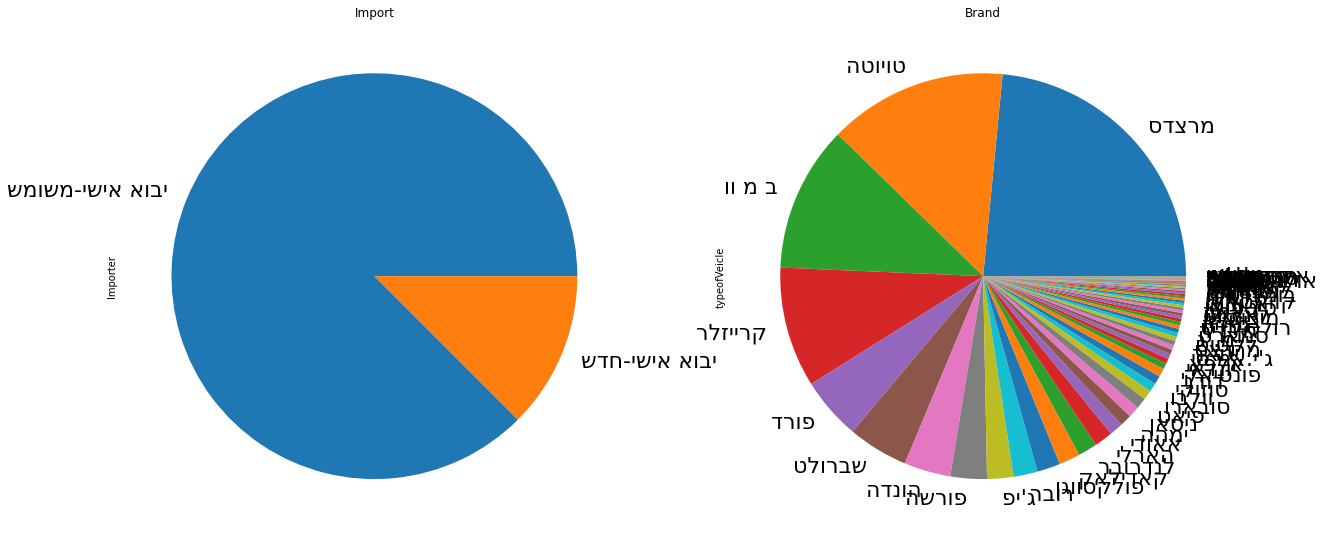

In [37]:
fig, axes = plt.subplots(1,2, figsize=(80,5))
result=df["Importer"].value_counts()
sr=pd.Series(result)
sr.plot(kind="pie",figsize=(20,20),ax=axes[0],title="Import",fontsize=22)
result=df["typeofVeicle"].value_counts()
sr=pd.Series(result)
sr.plot(kind="pie",figsize=(20,20),ax=axes[1],title="Brand",fontsize=22)

